# Notes for Libby and Finn

Hi all,

For some reason, your project wouldn't open up in Word for me ... and Moodle made it look like it was missing until I clicked through on Finn's submission. So, my apologies for the late responses!

Let's start with the Ising model from class:

In [2]:
import numpy as np, scipy as sp
from matplotlib import pyplot as plt
from numpy.random import random # import only one function
from numpy.random import randint

## Internal energy

Recall, the basic idea for the Ising model is that you want to be like your neighbors. So, we ended up with this in class:

In [3]:
def energy_internal(state):
    # minus sign means like neighbors give a negative number
    return -np.sum(
        state * np.roll(state, 1, axis=0) + # get all of the neighbors in one direction
        state * np.roll(state, 1, axis=1) +
        state * np.roll(state, -1, axis=0) +
        state * np.roll(state, -1, axis=1)
    )/2


## How do we use the Ising model

1. Pick a random row and column
2. Flip that one. If it was -1, make it +1. If it was +1, make it -1.
3. Do we want to take that coin flip? Well, if it's lower in energy, yes. If it's higher in energy, no.

Fancier version, called Metropolis Monte Carlo

1. Pick a random row and column
2. Flip that one. If it was -1, make it +1. If it was +1, make it -1.
3. Do we want to take that coin flip? 
   1. If it's lower energy, yes.
   2. If it's higher energy, do something based on temperature.

(Again, this should be the same as you saw in class)

So, we pick a starting state

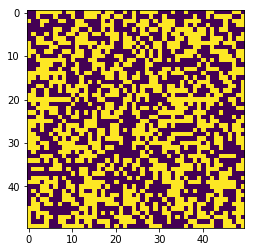

In [4]:
width = 50
state = random(size=(width,width))
state[state<=0.5] = -1
state[state>0.5] = 1
plt.imshow(state)

And we run it at a temperature that shows domains. In "magic scaled units" that's T = 2.27

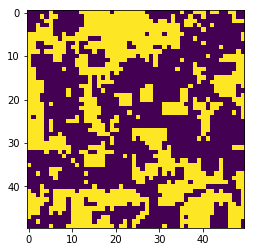

In [5]:
ntrials = 20000
T = 2.27
for ntrial in range(ntrials):
    row, column = randint(width), randint(width)
    # flip one at random
    # if it's lower in energy, take it. otherwise, reject it.
    new_state = state.copy()
    new_state[row,column] = -state[row,column]
    energy_change = energy_internal(new_state) - energy_internal(state)
    if energy_change < 0: # this asks if the new state is better
        state = new_state
    else:
        if random() < np.exp(-energy_change/T):
            state = new_state
plt.imshow(state)

Or, if we run it at a "hotter" temperature, we see it heat back up.

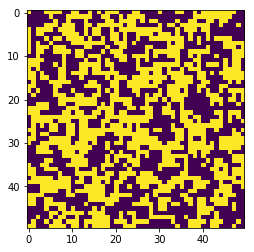

In [6]:
ntrials = 20000
T = 5
for ntrial in range(ntrials):
    row, column = randint(width), randint(width)
    # flip one at random
    # if it's lower in energy, take it. otherwise, reject it.
    new_state = state.copy()
    new_state[row,column] = -state[row,column]
    energy_change = energy_internal(new_state) - energy_internal(state)
    if energy_change < 0: # this asks if the new state is better
        state = new_state
    else:
        if random() < np.exp(-energy_change/T):
            state = new_state
plt.imshow(state)

Great. On to what you want. The full Ising model has the idea of a background field. For magnets, it's either spin up or spin down. You want something that's related to how likely a pathogen is to spread. So, let's just decide that squares with a value of `1` have the pathogen, and squares with a value of `-1` don't. Which is which? Let's draw a color bar:

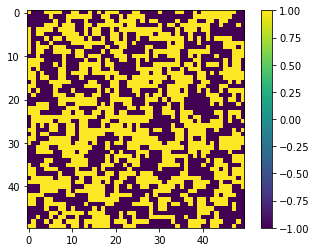

In [7]:
plt.imshow(state)
plt.colorbar()

OK. So the yellow squares have the pathogen. In the traditional Ising model, you have an external magnetic field, and each square is likely to align with that field. In your case, we'll use that to say how likely you are to get the pathogen.

That makes it sound more complicated than it is. Here's an easy way to visualize things. Let's say there's an external environment that makes everything more likely to have the pathogen. Except maybe for one little square. So, it should be all yellow in our visualization:

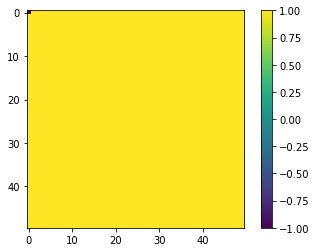

In [8]:
external_field = np.ones_like(state)
external_field[0,0] = -1
plt.imshow(external_field)
plt.colorbar()

# Now, how do we add up the energy?

Well, we just add a new term, called external_energy.

This takes advantage of some cute numerical stuff in python: when we multiply one matrix by another, it just multiplies the corresponding terms. So, (row 1, colum 1 of the first matrix) times (row 1, column 1 of the second matrix), (row 1, column 2 of the first matrix) times (row 1, column 2 of the second) , etc.

Then this just adds up each of those. Remind yourself of the reason we chose -1 and +1 before: when they're the same, you get +1 for the product. When they're different, you get -1.

In [9]:
def energy_external(state):
    return - np.sum(external_field*state)

Now we can re-do our Ising model, **adding in the external energy**

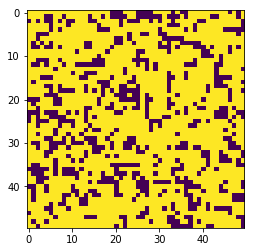

In [10]:
ntrials = 20000
T = 5
for ntrial in range(ntrials):
    row, column = randint(width), randint(width)
    # flip one at random
    # if it's lower in energy, take it. otherwise, reject it.
    new_state = state.copy()
    new_state[row,column] = -state[row,column]
    # THIS IS WHERE WE ADD THE NEW STUFF
    energy_change_internal = energy_internal(new_state) - energy_internal(state)
    energy_change_external = energy_external(new_state) - energy_external(state)
    energy_change = energy_change_internal + energy_change_external
    if energy_change < 0: # this asks if the new state is better
        state = new_state
    else:
        if random() < np.exp(-energy_change/T):
            state = new_state
plt.imshow(state)

See how, even though it's "random" it looks more yellow? Because our background field is more yellow, in escence. So, we if we just made part of it yellow?

This says "anything in a row greater than 25, and a column greater than 25, become `-1`

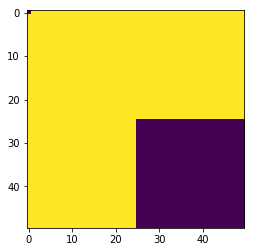

In [11]:
external_field[25:,25:] = -1
plt.imshow(external_field)

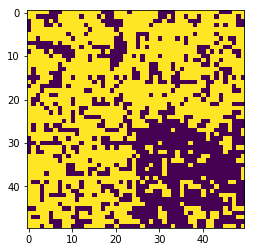

In [12]:
ntrials = 20000
T = 5
for ntrial in range(ntrials):
    row, column = randint(width), randint(width)
    # flip one at random
    # if it's lower in energy, take it. otherwise, reject it.
    new_state = state.copy()
    new_state[row,column] = -state[row,column]
    # THIS IS WHERE WE ADD THE NEW STUFF
    energy_change_internal = energy_internal(new_state) - energy_internal(state)
    energy_change_external = energy_external(new_state) - energy_external(state)
    energy_change = energy_change_internal + energy_change_external
    if energy_change < 0: # this asks if the new state is better
        state = new_state
    else:
        if random() < np.exp(-energy_change/T):
            state = new_state
plt.imshow(state)

So, you could make the external field look however you want. It doesn't have to be +1 and -1 ... it could have +2 or -2 in it for stronger effects.

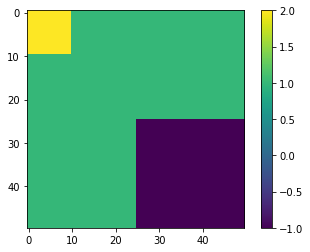

In [13]:
external_field[25:,25:] = -1
external_field[:10,:10] = 2
plt.imshow(external_field)
plt.colorbar()

So, you need to look carefully at the colors. In that one, yellow is +2, purple is -1. But when you plot the `state` later, you'll only have +1 and -1.

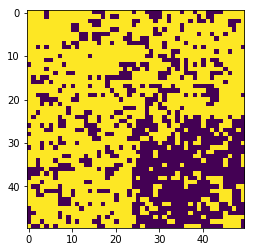

In [14]:
ntrials = 20000
T = 5
for ntrial in range(ntrials):
    row, column = randint(width), randint(width)
    # flip one at random
    # if it's lower in energy, take it. otherwise, reject it.
    new_state = state.copy()
    new_state[row,column] = -state[row,column]
    # THIS IS WHERE WE ADD THE NEW STUFF
    energy_change_internal = energy_internal(new_state) - energy_internal(state)
    energy_change_external = energy_external(new_state) - energy_external(state)
    energy_change = energy_change_internal + energy_change_external
    if energy_change < 0: # this asks if the new state is better
        state = new_state
    else:
        if random() < np.exp(-energy_change/T):
            state = new_state
plt.imshow(state)

So, the square at the top left really wants to spread pathogens. The square at the bottom right doesn't want to. That should give you something to start with. If you wanted to start with no pathogens, you'd start with everything set to -1:

In [15]:
state = np.ones_like(state) * -1

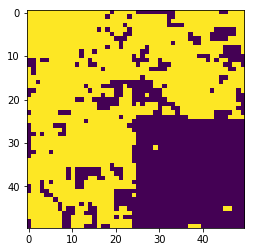

In [16]:
ntrials = 20000
T = 2
for ntrial in range(ntrials):
    row, column = randint(width), randint(width)
    # flip one at random
    # if it's lower in energy, take it. otherwise, reject it.
    new_state = state.copy()
    new_state[row,column] = -state[row,column]
    # THIS IS WHERE WE ADD THE NEW STUFF
    energy_change_internal = energy_internal(new_state) - energy_internal(state)
    energy_change_external = energy_external(new_state) - energy_external(state)
    energy_change = energy_change_internal + energy_change_external
    if energy_change < 0: # this asks if the new state is better
        state = new_state
    else:
        if random() < np.exp(-energy_change/T):
            state = new_state
plt.imshow(state)

So, that should give you something to play around with. Play with that, ask some questions, and we'll make it better.

## Making something like your example

Your example looked something like this:

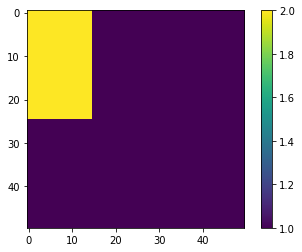

In [19]:
external_field = np.ones_like(state)
# make the top left chunk livestock waste
# where livestock waste is really bad news

external_field[0:25,0:15] = 2
plt.imshow(external_field)
plt.colorbar()

So, the above part says "everything that's between rows 0 and 25 and also between columns 0 and 15 gets set to 2"

Now we can set the agg field to something intermediate, like zero. We'll make that the same columns 0 to 15, but this time it's rows 25 to 50.

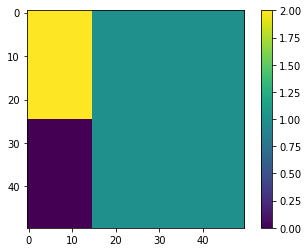

In [20]:
external_field[25:50,0:15] = 0
plt.imshow(external_field)
plt.colorbar()

You also had undeveloped forest ... let's say that makes it hard for the pathogen to spread. You had that covering the top right and then the right side.

Right side: columns 35 - 50, all rows

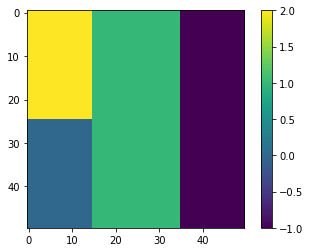

In [21]:
external_field[0:50,35:50] = -1
plt.imshow(external_field)
plt.colorbar()

And then a little chunk of more forest. Note that the colors are changing each time, as Python automatically scales the lowest value to purple and the highest to yellow.

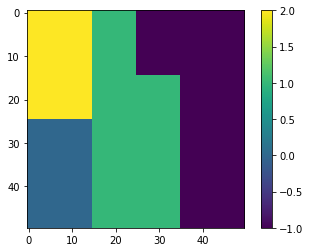

In [22]:
external_field[0:15,25:35] = -1
plt.imshow(external_field)
plt.colorbar()

You also had people in one chunk. I don't know, but let's say people spread the pathogen quite a bit as well. Maybe a value of 1.5?

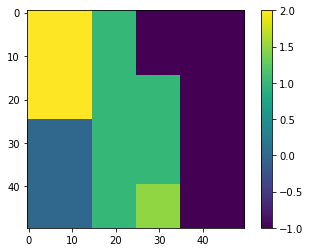

In [23]:
external_field[40:50,25:35] = 1.5
plt.imshow(external_field)
plt.colorbar()

If we had been clever, we could have done that all in one cell:

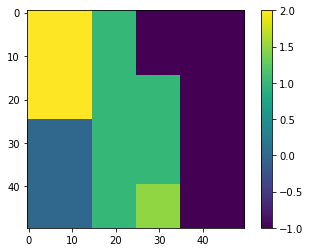

In [24]:
external_field = np.ones_like(state)

external_field[0:25,0:15] = 2
external_field[25:50,0:15] = 0
external_field[0:50,35:50] = -1
external_field[0:15,25:35] = -1
external_field[40:50,25:35] = 1.5

plt.imshow(external_field)
plt.colorbar()

And now we could run the model

In [30]:
state = np.ones_like(state) * -1

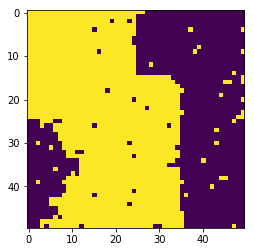

In [31]:
T = 2.27
ntrials = 100000
for ntrial in range(ntrials):
    row, column = randint(width), randint(width)
    # flip one at random
    # if it's lower in energy, take it. otherwise, reject it.
    new_state = state.copy()
    new_state[row,column] = -state[row,column]
    # THIS IS WHERE WE ADD THE NEW STUFF
    energy_change_internal = energy_internal(new_state) - energy_internal(state)
    energy_change_external = energy_external(new_state) - energy_external(state)
    energy_change = energy_change_internal + energy_change_external
    if energy_change < 0: # this asks if the new state is better
        state = new_state
    else:
        if random() < np.exp(-energy_change/T):
            state = new_state
plt.imshow(state)

And you could then ask things like "what effect does temperature have?" What sorts of environments lead to infections in the bottom corner? How long do I need to run the model before I get an infection in that corner? etc.